#### This project is a Metaverse transaction status problem.
##### The project aims at classifying whether a transaction is a Low risk transaction, moderate risk transaction or high risk transaction

* Import relevant libraries and the data

In [179]:
import pandas as pd
df = pd.read_csv('data/metaverse_transactions_dataset.csv',
                parse_dates = ['timestamp'])
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


* Checking the information of the data

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          78600 non-null  datetime64[ns]
 1   hour_of_day        78600 non-null  int64         
 2   sending_address    78600 non-null  object        
 3   receiving_address  78600 non-null  object        
 4   amount             78600 non-null  float64       
 5   transaction_type   78600 non-null  object        
 6   location_region    78600 non-null  object        
 7   ip_prefix          78600 non-null  float64       
 8   login_frequency    78600 non-null  int64         
 9   session_duration   78600 non-null  int64         
 10  purchase_pattern   78600 non-null  object        
 11  age_group          78600 non-null  object        
 12  risk_score         78600 non-null  float64       
 13  anomaly            78600 non-null  object        
dtypes: dat

* Getting the counts of the target feature

In [181]:
df.anomaly.value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

* Low risk transactions are more common in the dataset and high risk transaction are less common

* Exploring the types of transactions available.

<Axes: xlabel='transaction_type'>

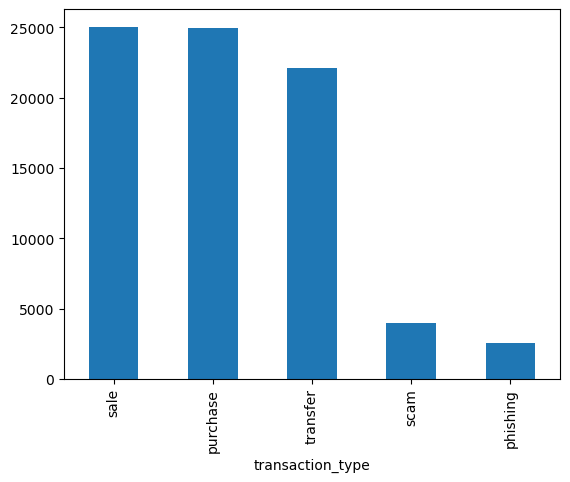

In [182]:
df.transaction_type.value_counts().plot.bar()

* Performing a deep-dive into the 'High risk' category

In [183]:
high_risk_df = df[df.anomaly == 'high_risk']

In [184]:
high_risk_df.transaction_type.value_counts()

transaction_type
scam        3949
phishing    2546
Name: count, dtype: int64

* Most of the high risk transaction are either a scam or a phishing transaction

In [185]:
high_risk_df.location_region.value_counts()

location_region
North America    1354
Asia             1312
Africa           1303
South America    1293
Europe           1233
Name: count, dtype: int64

In [186]:
df.location_region.value_counts()

location_region
North America    15840
Europe           15807
Asia             15731
South America    15669
Africa           15553
Name: count, dtype: int64

In [187]:
df.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

* There are no missing data in the datasets and no duplicates

In [188]:
df[df.duplicated()]

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly


In [189]:
df.sending_address.value_counts()

sending_address
0x4bfe6fa35149db081520aea5e503946572718756    232
0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155    204
0x91ee0c3b3f87d070e260f6208c52534d36817dae    203
0xccbf5a9926606c77db8391185066a8ee3bc0a2af    203
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9    203
                                             ... 
0xeb57df95b6822a78c2be987e14df39eb23221134     29
0xa08d2ae262a2181cfaef98f76adbb10396504fcf     29
0xe79cfaf34f8d8c3e20a2a202ee64e2542b74f78f     29
0xb52a1c71ffa5252b865e3e7e885f0d74b4984d60     29
0x95a91a4a20a4522edc7bd90efe20287e365b3637     29
Name: count, Length: 1161, dtype: int64

In [190]:
df.receiving_address.value_counts()

receiving_address
0x86b61ffe9ce4da504e6b7cf3f0925c1941265074    232
0x617b83371b4c65debb6c2e90de89c827ddcb0884    203
0x897c07cac7f9149d0be00903c55d810f6e42c9cc    203
0xbc9bc0162fe1ef6624c4f9ea0139576e7407a99d    203
0x0496b829a3ede37a92aa2b9b101549ed23018cb8    203
                                             ... 
0x51a53117845631a7d7f3be1380c2ad8b1bf0b804     29
0xe0985c197011d1a8a9c495c5bd64442d16db5f36     29
0x3108e1d0956526998fc5cc8a008ea4fed631162b     29
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9     29
0x6581e36d96fae9eec6e9b94802ffab6e3f017462     29
Name: count, Length: 1166, dtype: int64

In [191]:
df[df.sending_address == '0x4bfe6fa35149db081520aea5e503946572718756'].head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
173,2022-02-05 01:58:48,1,0x4bfe6fa35149db081520aea5e503946572718756,0x2c934cd327d06eca3c8232ae66a818e1d9daf0c9,309.044609,purchase,South America,172.160,1,22,random,new,49.6125,low_risk
636,2022-03-25 13:28:51,13,0x4bfe6fa35149db081520aea5e503946572718756,0xb8f622392d62bf1b4cc825591ed7fafdf8409216,665.719425,sale,Europe,192.168,7,154,high_value,veteran,52.5000,low_risk
1939,2022-10-08 17:55:14,17,0x4bfe6fa35149db081520aea5e503946572718756,0x06b7ab84b65c20ef760cf7a52903a9c903f61cab,706.486444,transfer,South America,192.168,7,139,high_value,veteran,43.7500,low_risk
2032,2022-02-13 20:57:11,20,0x4bfe6fa35149db081520aea5e503946572718756,0x43ffc8b14dfe8416e64ad6a594893863e05d69bd,692.405376,purchase,Africa,192.000,3,65,focused,established,26.2500,low_risk
2360,2022-02-27 15:14:53,15,0x4bfe6fa35149db081520aea5e503946572718756,0xc2bc23a6310f61a0dae6e65c20d02cbed5df2883,718.556581,purchase,South America,10.000,5,77,focused,established,31.2500,low_risk


* Extracting day, month and year features from the timestamp feature.

In [192]:
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month_name()
df['day'] = df.timestamp.dt.day
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,2022,April,11
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,2022,June,14
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,2022,January,18
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,2022,June,15
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,2022,February,18


In [193]:
df.transaction_type.value_counts()

transaction_type
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

In [194]:
df.describe()

,timestamp,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score,year,day
count,78600,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.0,78600.000000
mean,2022-07-02 15:42:18.166437888,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722,2022.0,15.747303
min,2022-01-01 00:00:45,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000,2022.0,1.000000
25%,2022-04-02 02:37:59.500000,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000,2022.0,8.000000
50%,2022-07-02 17:46:33,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000,2022.0,16.000000
75%,2022-10-02 09:00:14,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000,2022.0,23.000000
max,2022-12-31 23:47:40,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000,2022.0,31.000000
std,NaN,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365,0.0,8.820144


In [195]:
df.drop('timestamp',
       axis = 1,
       inplace = True)
df.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
0,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,2022,April,11
1,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,2022,June,14
2,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,2022,January,18
3,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,2022,June,15
4,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,2022,February,18


* Exoloring the purchase pattern feature 

<Axes: xlabel='purchase_pattern'>

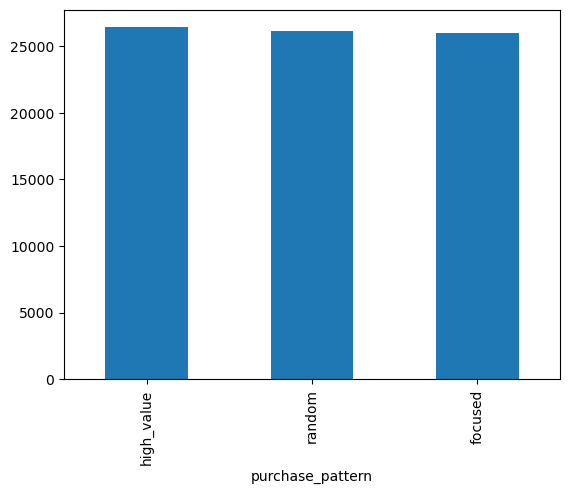

In [196]:
df.purchase_pattern.value_counts().plot.bar()

* Exploring the age group feature

<Axes: ylabel='age_group'>

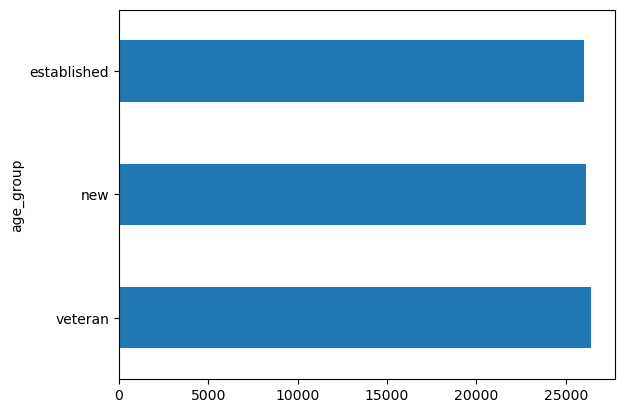

In [197]:
df.age_group.value_counts().plot.barh()

In [198]:
age_vet = df[df.age_group == 'veteran']
age_vet.age_group.value_counts()

age_group
veteran    26422
Name: count, dtype: int64

In [199]:
age_vet.anomaly.value_counts()

anomaly
low_risk         18205
moderate_risk     8217
Name: count, dtype: int64

* Transactions carried out by Veterans are mostly have low and moderate risk.

In [200]:
age_est = df[df.age_group == 'established']
age_est.anomaly.value_counts()

anomaly
low_risk    26033
Name: count, dtype: int64

* All the transactions carried out by Established traders have low risk

In [201]:
age_new = df[df.age_group == 'new']
age_new.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
7,19,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,800.208934,sale,South America,192.000,1,32,random,new,50.00,low_risk,2022,March,30
13,20,0xd2cff98e8e707049db92500414fec6f0bb5c895c,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,792.988174,purchase,South America,192.000,2,38,random,new,43.75,low_risk,2022,June,2
19,6,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59,0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82,230.214385,phishing,Europe,10.000,1,25,random,new,100.00,high_risk,2022,June,7
36,9,0x0f00f63e28dc0e131d2df0859a6e700a79430a72,0xfafb6c7bcac939fccb380f622e3d2630d5b02ca8,606.765725,sale,South America,172.160,1,34,random,new,42.00,low_risk,2022,August,10
40,18,0xa608f7958061ae8498d73aa0d8f6f5e8f51135ae,0x7409609cded76dc9192abdcbb3036b0dbe045328,590.015898,purchase,Asia,192.168,1,31,random,new,36.75,low_risk,2022,October,22


In [202]:
age_new.anomaly.value_counts()

anomaly
low_risk         19256
high_risk         6495
moderate_risk      394
Name: count, dtype: int64

* High risk transactions are mostly carried out by new traders

In [203]:
age_new.transaction_type.value_counts()

transaction_type
purchase    6662
transfer    6505
sale        6483
scam        3949
phishing    2546
Name: count, dtype: int64

In [204]:
age_vet.transaction_type.value_counts()

transaction_type
sale        18557
transfer     7865
Name: count, dtype: int64

In [205]:
age_est.transaction_type.value_counts()

transaction_type
purchase    18278
transfer     7755
Name: count, dtype: int64

* Phishing is a type of online fraud that involves scammers impersonating a brand or business to fool users (customers, employees, partners, etc) into giving up sensitive information.

* Fraudulent transactions are mostly done by New traders

In [206]:
df.purchase_pattern.value_counts()

purchase_pattern
high_value    26422
random        26145
focused       26033
Name: count, dtype: int64

In [207]:
df.drop_duplicates()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
0,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk,2022,April,11
1,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk,2022,June,14
2,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk,2022,January,18
3,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk,2022,June,15
4,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk,2022,February,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk,2022,February,13
78596,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk,2022,February,16
78597,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk,2022,August,4
78598,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk,2022,February,26


* There are no duplicate transactions

* Now that i have determined the type of transactions that are fraudulent, knowing the geography that most fraudulent transactions occur is important

In [208]:
age_new.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
7,19,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,800.208934,sale,South America,192.000,1,32,random,new,50.00,low_risk,2022,March,30
13,20,0xd2cff98e8e707049db92500414fec6f0bb5c895c,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,792.988174,purchase,South America,192.000,2,38,random,new,43.75,low_risk,2022,June,2
19,6,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59,0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82,230.214385,phishing,Europe,10.000,1,25,random,new,100.00,high_risk,2022,June,7
36,9,0x0f00f63e28dc0e131d2df0859a6e700a79430a72,0xfafb6c7bcac939fccb380f622e3d2630d5b02ca8,606.765725,sale,South America,172.160,1,34,random,new,42.00,low_risk,2022,August,10
40,18,0xa608f7958061ae8498d73aa0d8f6f5e8f51135ae,0x7409609cded76dc9192abdcbb3036b0dbe045328,590.015898,purchase,Asia,192.168,1,31,random,new,36.75,low_risk,2022,October,22


In [209]:
age_new.anomaly.value_counts()

anomaly
low_risk         19256
high_risk         6495
moderate_risk      394
Name: count, dtype: int64

In [210]:
age_new.location_region.value_counts()

location_region
North America    5347
Asia             5267
South America    5204
Africa           5166
Europe           5161
Name: count, dtype: int64

In [211]:
new_highrisk = age_new[age_new.anomaly == 'high_risk']
new_highrisk.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day
19,6,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59,0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82,230.214385,phishing,Europe,10.000,1,25,random,new,100.0,high_risk,2022,June,7
68,16,0xd03d6a433a903052df6420f3756a79b8cc7aadcd,0x99d8f6c4760a1078c3bceed9e27e397fb488e19a,0.010000,scam,Europe,172.160,2,31,random,new,90.0,high_risk,2022,November,30
80,14,0x03ebaf3f967767ea31c49025fd6928619ec43afd,0xc7bdf2bdc064310896794a9cd1db8eef07ffc32e,303.299117,phishing,South America,172.160,1,26,random,new,100.0,high_risk,2022,August,13
86,23,0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5,0x4bfe6fa35149db081520aea5e503946572718756,719.112642,scam,Europe,192.000,2,22,random,new,100.0,high_risk,2022,January,18
92,23,0xf6511ed068459cab3225fb900437fdfae446e53a,0x113844f9fdd2eb60e8083dec243c1d9522c8af9a,578.199474,scam,South America,192.168,2,28,random,new,94.5,high_risk,2022,April,5


In [212]:
new_highrisk.location_region.value_counts()

location_region
North America    1354
Asia             1312
Africa           1303
South America    1293
Europe           1233
Name: count, dtype: int64

* The location that the fraudulent transactions are coming from is not just one place in particular

#### Analysis of the amount received and sent by each address

In [213]:
#yearly_sales = df[['sales_year','Sales']].groupby(['sales_year']).sum().reset_index()
age_new_amount = age_new[['transaction_type','amount']].groupby(['transaction_type']).sum().reset_index()
age_new_amount.head()

,transaction_type,amount
0,phishing,1.260243e+06
1,purchase,3.419052e+06
2,sale,3.271618e+06
3,scam,1.957074e+06
4,transfer,3.235999e+06


In [214]:
age_new_amount.sort_values(by = 'amount',
                           ascending = False
                          )

,transaction_type,amount
1,purchase,3.419052e+06
2,sale,3.271618e+06
4,transfer,3.235999e+06
3,scam,1.957074e+06
0,phishing,1.260243e+06


In [215]:
sending_amount = df[['sending_address','amount']].groupby('sending_address').sum().reset_index()

In [216]:
sending_amount.sort_values(by = 'amount',
                          ascending = False)

,sending_address,amount
326,0x4bfe6fa35149db081520aea5e503946572718756,112922.957294
926,0xceda6c769350a084f02a6e5f2fadf269ecc0c37d,105376.079982
137,0x1d132c165feddfa72ab5fca8b7dfa522efb53a56,103292.624300
913,0xccbf5a9926606c77db8391185066a8ee3bc0a2af,99668.867105
1102,0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9,97767.455392
...,...,...
480,0x6d5b2cce3ffd47ffc39d45a2dc999f81d734de1a,12148.015102
412,0x5dccf231413722cebfffd5c550ea841287b95d90,11952.832318
671,0x95a91a4a20a4522edc7bd90efe20287e365b3637,11572.762197
43,0x086339449d673e74e79553e92be7bab5dacf53cb,11504.003943


In [217]:
receiving_amount = df[['receiving_address','amount']].groupby('receiving_address').sum().reset_index()
receiving_amount

,receiving_address,amount
0,0x00070ac7479dedee29d468ff8f07afa40564ae4a,45976.974962
1,0x00262fa3b21847775e2db42965d0192e8dfe5bdc,32225.597413
2,0x002bcd751410a69b3bce463890abb2fcab81a755,44966.665601
3,0x00318c7963a45ceb6b3101e1794ad42137da8f3f,15996.647591
4,0x003ebce509d14e6252dc14c35beb43d2dc52f35c,58932.150286
...,...,...
1161,0xfed686624c08633d15a980522d29b77319a1a65f,47340.763830
1162,0xff209e4a1ce114ec3e245cf48fa19eeaff9cec31,26173.519178
1163,0xffa670245089044b1e355508a7843692a25a5e52,31219.758775
1164,0xffbdcd1c606b88a37e953dd81cc8d20b11a9d77a,42755.403969


In [218]:
receiving_amount.sort_values(by = 'amount',
                            ascending = False)

,receiving_address,amount
607,0x86b61ffe9ce4da504e6b7cf3f0925c1941265074,117630.565333
852,0xbc9bc0162fe1ef6624c4f9ea0139576e7407a99d,105774.509113
439,0x617b83371b4c65debb6c2e90de89c827ddcb0884,105676.569299
622,0x897c07cac7f9149d0be00903c55d810f6e42c9cc,104482.767220
28,0x0496b829a3ede37a92aa2b9b101549ed23018cb8,103013.761338
...,...,...
844,0xbb0b92025eddb26c67e5f23512a856d6c0c26231,11630.598734
600,0x85e741760a4df0cd6ab9c26747932ce71fa93883,11589.364466
801,0xb2e8073423ca63ec9cce39250a1342a5206ab87f,10932.306597
873,0xc16838071bd498347aab8cc742473568eb5249fd,10821.565172


In [219]:
df.nunique()

hour_of_day             24
sending_address       1161
receiving_address     1166
amount               76771
transaction_type         5
location_region          5
ip_prefix                5
login_frequency          8
session_duration       140
purchase_pattern         3
age_group                3
risk_score              31
anomaly                  3
year                     1
month                   12
day                     31
dtype: int64

In [220]:
df.risk_score.value_counts()

risk_score
26.2500     9987
52.5000     7535
36.7500     5900
100.0000    4275
35.4375     4216
50.0000     3813
31.2500     3771
25.0000     3747
15.7500     3207
70.8750     3072
62.5000     2861
42.0000     2620
49.6125     2415
43.7500     2267
35.0000     2132
94.5000     1594
67.5000     1577
33.7500     1533
42.1875     1529
21.2625     1250
18.7500     1193
15.0000     1190
84.3750     1101
56.7000     1091
40.0000      957
59.0625      934
47.2500      879
90.0000      626
20.2500      476
25.3125      439
54.0000      413
Name: count, dtype: int64

In [221]:
df.corr(numeric_only = True)

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score,year,day
hour_of_day,1.000000,0.000484,-0.003166,0.004483,0.006132,-0.190985,NaN,0.003444
amount,0.000484,1.000000,-0.001376,-0.000718,0.000355,0.114075,NaN,0.000330
ip_prefix,-0.003166,-0.001376,1.000000,-0.000553,0.000959,0.004278,NaN,0.002384
login_frequency,0.004483,-0.000718,-0.000553,1.000000,0.871915,0.033010,NaN,0.004112
session_duration,0.006132,0.000355,0.000959,0.871915,1.000000,0.107844,NaN,0.008431
risk_score,-0.190985,0.114075,0.004278,0.033010,0.107844,1.000000,NaN,0.002701
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.003444,0.000330,0.002384,0.004112,0.008431,0.002701,NaN,1.000000


#### Visualisation of the trends between different features

In [222]:
import seaborn as sns
sns.set_style()

<Axes: xlabel='login_frequency', ylabel='amount'>

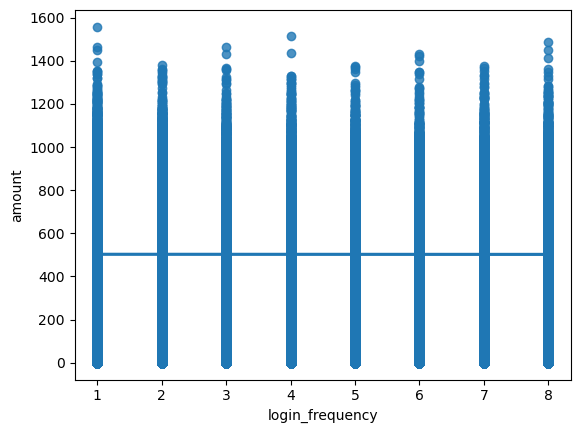

In [223]:
sns.regplot(x = 'login_frequency',
           y = 'amount',
           data = df)

<Axes: xlabel='day', ylabel='amount'>

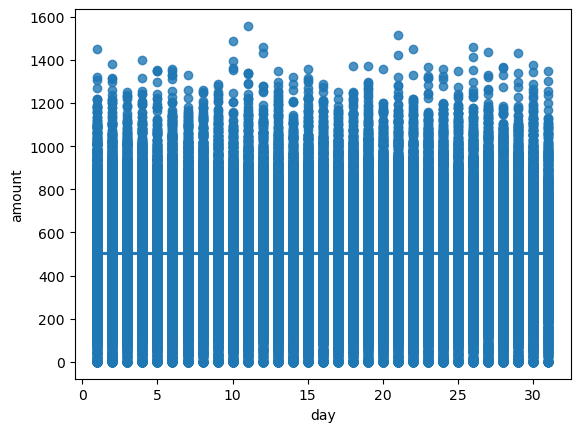

In [224]:
sns.regplot(x = 'day',
           y = 'amount',
           data = df)

<Axes: xlabel='risk_score', ylabel='amount'>

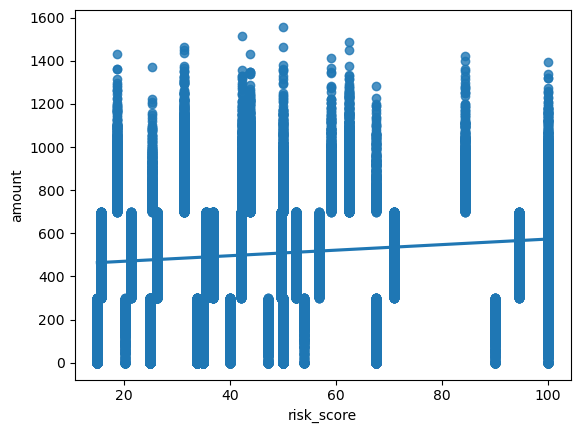

In [225]:
sns.regplot(x = 'risk_score',
           y = 'amount',
           data = df)

<Axes: xlabel='hour_of_day', ylabel='amount'>

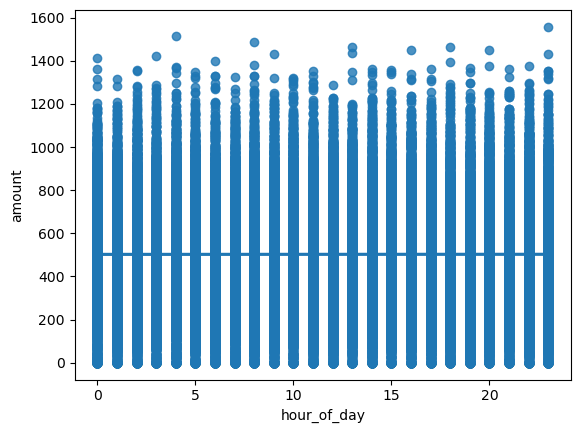

In [226]:
sns.regplot(x = 'hour_of_day',
           y = 'amount',
           data = df)

* There appears to be no visible trends between amount and hour_of_day, day, login_frequency and risk_score

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [228]:
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [229]:
import pickle

#### Feature Engineering

* Two of the categorical features available in the dataset have over 1000 categories present, and as such, i have to deal with them, I will be trying the frequency encoding method first
* This method involves encoding the category with its frequency

In [230]:
"""col = ['sending_address', 'receiving_address']
for c in col:
    freq = df[c].value_counts()
    df[c + '_freq'] = df[c].map(freq)
df"""


sending_add = df['sending_address'].value_counts(normalize=True).to_dict()
receiving_add = df['receiving_address'].value_counts(normalize=True).to_dict()

In [231]:
#saving the dictionary files into pickle

import json

with open('sending_add.json','w') as f:
    json.dump(sending_add,f)

with open('receiving_add.json','w') as f:
    json.dump(receiving_add,f)

In [232]:
# Replace categorical columns with frequency values
df['sending_address_encoded'] = df['sending_address'].map(sending_add)
df['receiving_address_encoded'] = df['receiving_address'].map(receiving_add)

In [233]:
df.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day,sending_address_encoded,receiving_address_encoded
0,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,2022,April,11,0.000382,0.000751
1,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,2022,June,14,0.001858,0.001489
2,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,2022,January,18,0.001858,0.001489
3,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,2022,June,15,0.001120,0.001489
4,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,2022,February,18,0.000751,0.000751


In [234]:
df.drop(['sending_address', 'receiving_address'],
       axis = 1,
       inplace = True)
df

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day,sending_address_encoded,receiving_address_encoded
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk,2022,April,11,0.000382,0.000751
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk,2022,June,14,0.001858,0.001489
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk,2022,January,18,0.001858,0.001489
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk,2022,June,15,0.001120,0.001489
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk,2022,February,18,0.000751,0.000751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,12,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk,2022,February,13,0.001120,0.000382
78596,16,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk,2022,February,16,0.000751,0.001120
78597,16,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk,2022,August,4,0.000751,0.001489
78598,4,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk,2022,February,26,0.002595,0.001120


* The remaining categorical features will be encoded using OneHotEncoding

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hour_of_day                78600 non-null  int64  
 1   amount                     78600 non-null  float64
 2   transaction_type           78600 non-null  object 
 3   location_region            78600 non-null  object 
 4   ip_prefix                  78600 non-null  float64
 5   login_frequency            78600 non-null  int64  
 6   session_duration           78600 non-null  int64  
 7   purchase_pattern           78600 non-null  object 
 8   age_group                  78600 non-null  object 
 9   risk_score                 78600 non-null  float64
 10  anomaly                    78600 non-null  object 
 11  year                       78600 non-null  int32  
 12  month                      78600 non-null  object 
 13  day                        78600 non-null  int

In [236]:
df1 = df.copy()

In [237]:
df1.drop(columns=['ip_prefix','hour_of_day',
                  'month','day','year'],inplace = True)

In [238]:
df1.head()

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
0,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk,0.000382,0.000751
1,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk,0.001858,0.001489
2,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk,0.001858,0.001489
3,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk,0.001120,0.001489
4,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk,0.000751,0.000751


In [239]:
df1.describe()

,amount,login_frequency,session_duration,risk_score,sending_address_encoded,receiving_address_encoded
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,502.574903,4.178702,69.684606,44.956722,0.001109,0.001118
std,245.898146,2.366038,40.524476,21.775365,0.000512,0.000533
min,0.010000,1.000000,20.000000,15.000000,0.000369,0.000369
25%,331.319966,2.000000,35.000000,26.250000,0.000738,0.000738
50%,500.029500,4.000000,60.000000,40.000000,0.001107,0.001107
75%,669.528311,6.000000,100.000000,52.500000,0.001476,0.001476
max,1557.150905,8.000000,159.000000,100.000000,0.002952,0.002952


In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   amount                     78600 non-null  float64
 1   transaction_type           78600 non-null  object 
 2   location_region            78600 non-null  object 
 3   login_frequency            78600 non-null  int64  
 4   session_duration           78600 non-null  int64  
 5   purchase_pattern           78600 non-null  object 
 6   age_group                  78600 non-null  object 
 7   risk_score                 78600 non-null  float64
 8   anomaly                    78600 non-null  object 
 9   sending_address_encoded    78600 non-null  float64
 10  receiving_address_encoded  78600 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 6.6+ MB


In [241]:
df1.anomaly.value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

In [242]:
df1.anomaly = df1.anomaly.replace({'high_risk':1,
                                  'low_risk':0,
                                  'moderate_risk':1})

In [243]:
df1.head(5)

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
0,796.949206,transfer,Europe,3,48,focused,established,18.75,0,0.000382,0.000751
1,0.010000,purchase,South America,5,61,focused,established,25.00,0,0.001858,0.001489
2,778.197390,purchase,Asia,3,74,focused,established,31.25,0,0.001858,0.001489
3,300.838358,transfer,South America,8,111,high_value,veteran,36.75,0,0.001120,0.001489
4,775.569344,sale,Africa,6,100,high_value,veteran,62.50,1,0.000751,0.000751


In [244]:
df1.describe()

,amount,login_frequency,session_duration,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,502.574903,4.178702,69.684606,44.956722,0.192188,0.001109,0.001118
std,245.898146,2.366038,40.524476,21.775365,0.394023,0.000512,0.000533
min,0.010000,1.000000,20.000000,15.000000,0.000000,0.000369,0.000369
25%,331.319966,2.000000,35.000000,26.250000,0.000000,0.000738,0.000738
50%,500.029500,4.000000,60.000000,40.000000,0.000000,0.001107,0.001107
75%,669.528311,6.000000,100.000000,52.500000,0.000000,0.001476,0.001476
max,1557.150905,8.000000,159.000000,100.000000,1.000000,0.002952,0.002952


In [245]:
df1_train = df1.iloc[0:60001,:]
df1_test = df1.iloc[60001:,:]

In [246]:
df1_train.head(1)

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
0,796.949206,transfer,Europe,3,48,focused,established,18.75,0,0.000382,0.000751


In [247]:
df1_train.anomaly.value_counts()

anomaly
0    48419
1    11582
Name: count, dtype: int64

In [248]:
df1_test.anomaly.value_counts()

anomaly
0    15075
1     3524
Name: count, dtype: int64

In [249]:
cat_columns = []

for c in df1_train.columns:
    if df1_train[c].dtype == 'object':
        cat_columns.append(c)
    

In [250]:
cat_columns

['transaction_type', 'location_region', 'purchase_pattern', 'age_group']

In [251]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_values = encoder.fit_transform(df1_train[cat_columns])
encoded_values = pd.DataFrame(encoded_values,columns = encoder.get_feature_names_out(cat_columns))
encoded_values.head()

,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [252]:
pickle.dump(encoder,open('encoder.pkl','wb'))

In [253]:
df1_train = pd.concat([df1_train.drop(columns=cat_columns),encoded_values],
axis=1)

In [254]:
df1_train.head()

,amount,login_frequency,session_duration,risk_score,anomaly,sending_address_encoded,receiving_address_encoded,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,796.949206,3,48,18.75,0,0.000382,0.000751,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010000,5,61,25.00,0,0.001858,0.001489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,778.197390,3,74,31.25,0,0.001858,0.001489,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,300.838358,8,111,36.75,0,0.001120,0.001489,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,775.569344,6,100,62.50,1,0.000751,0.000751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [255]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60001 entries, 0 to 60000
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   amount                         60001 non-null  float64
 1   login_frequency                60001 non-null  int64  
 2   session_duration               60001 non-null  int64  
 3   risk_score                     60001 non-null  float64
 4   anomaly                        60001 non-null  int64  
 5   sending_address_encoded        60001 non-null  float64
 6   receiving_address_encoded      60001 non-null  float64
 7   transaction_type_purchase      60001 non-null  float64
 8   transaction_type_sale          60001 non-null  float64
 9   transaction_type_scam          60001 non-null  float64
 10  transaction_type_transfer      60001 non-null  float64
 11  location_region_Asia           60001 non-null  float64
 12  location_region_Europe         60001 non-null 

In [256]:
X = df1_train.drop('anomaly',axis=1)
y = df1_train.anomaly

In [257]:
#cross validation


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the two models
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=1000)

# Define a Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for both models
scores_model1 = cross_val_score(model1, X, y, cv=cv, scoring='accuracy')
scores_model2 = cross_val_score(model2, X, y, cv=cv, scoring='accuracy')

# Print accuracy comparison
print("Model 1 (Random Forest):")
print(f"Accuracy scores: {scores_model1}")
print(f"Mean accuracy: {scores_model1.mean():.4f}")

print("\nModel 2 (Logistic Regression):")
print(f"Accuracy scores: {scores_model2}")
print(f"Mean accuracy: {scores_model2.mean():.4f}")

# Evaluate models on additional metrics (e.g., ROC AUC)
scores_auc_model1 = cross_val_score(model1, X, y, cv=cv, scoring='roc_auc')
scores_auc_model2 = cross_val_score(model2, X, y, cv=cv, scoring='roc_auc')

print("\nComparison of ROC AUC:")
print(f"Random Forest Mean ROC AUC: {scores_auc_model1.mean():.4f}")
print(f"Logistic Regression Mean ROC AUC: {scores_auc_model2.mean():.4f}")


c:\Users\Public\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 (Random Forest):
Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0000

Model 2 (Logistic Regression):
Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0000


c:\Users\Public\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Comparison of ROC AUC:
Random Forest Mean ROC AUC: 1.0000
Logistic Regression Mean ROC AUC: 1.0000


In [258]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_test.shape,X_train.shape,y_test.shape,y_train.shape

((12001, 18), (48000, 18), (12001,), (48000,))

In [259]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'CatBoostClassifier':CatBoostClassifier(),
          'XGBClassifier':XGBClassifier()}

def fit_model(models,X_train,X_test,y_train,y_test):

    model_score = {}

    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score
fit_model(models,X_train,X_test,y_train,y_test)

c:\Users\Public\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.053805
0:	learn: 0.4975016	total: 17.5ms	remaining: 17.5s
1:	learn: 0.3506009	total: 34.2ms	remaining: 17.1s
2:	learn: 0.2486787	total: 52.7ms	remaining: 17.5s
3:	learn: 0.1783247	total: 70.2ms	remaining: 17.5s
4:	learn: 0.1188005	total: 86.1ms	remaining: 17.1s
5:	learn: 0.0874474	total: 104ms	remaining: 17.2s
6:	learn: 0.0622875	total: 122ms	remaining: 17.2s
7:	learn: 0.0464101	total: 138ms	remaining: 17.1s
8:	learn: 0.0342580	total: 156ms	remaining: 17.2s
9:	learn: 0.0258120	total: 172ms	remaining: 17s
10:	learn: 0.0197158	total: 191ms	remaining: 17.2s
11:	learn: 0.0148987	total: 212ms	remaining: 17.5s
12:	learn: 0.0115122	total: 231ms	remaining: 17.5s
13:	learn: 0.0091095	total: 247ms	remaining: 17.4s
14:	learn: 0.0072423	total: 263ms	remaining: 17.3s
15:	learn: 0.0059452	total: 281ms	remaining: 17.3s
16:	learn: 0.0049292	total: 299ms	remaining: 17.3s
17:	learn: 0.0041605	total: 317ms	remaining: 17.3s
18:	learn: 0.0035550	total: 333ms	remaining: 17.2s
19:	lear

{'LogisticRegression': 0.9968335972002333,
 'RandomForestClassifier': 1.0,
 'CatBoostClassifier': 1.0,
 'XGBClassifier': 1.0}

In [260]:
rand_model = RandomForestClassifier(random_state=42)
rand_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [261]:
rand_model.score(X_test,y_test)

1.0

In [262]:
from sklearn.metrics import classification_report
preds = rand_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9696
           1       1.00      1.00      1.00      2305

    accuracy                           1.00     12001
   macro avg       1.00      1.00      1.00     12001
weighted avg       1.00      1.00      1.00     12001



In [263]:
X_train.columns

Index(['amount', 'login_frequency', 'session_duration', 'risk_score',
       'sending_address_encoded', 'receiving_address_encoded',
       'transaction_type_purchase', 'transaction_type_sale',
       'transaction_type_scam', 'transaction_type_transfer',
       'location_region_Asia', 'location_region_Europe',
       'location_region_North America', 'location_region_South America',
       'purchase_pattern_high_value', 'purchase_pattern_random',
       'age_group_new', 'age_group_veteran'],
      dtype='object')

In [264]:
with open('rand_model.pkl', 'wb') as file:
    pickle.dump(rand_model, file)

In [265]:
import streamlit as st

In [266]:
st.text_input

<bound method TextWidgetsMixin.text_input of DeltaGenerator()>

In [ ]:
st.time_input

In [ ]:
st.date_input

In [170]:
##evaluating the performance

In [267]:
df1_test.head()

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
60001,404.153564,sale,Europe,6,81,high_value,veteran,70.8750,1,0.001107,0.001107
60002,512.271595,sale,Africa,8,133,high_value,veteran,70.8750,1,0.001107,0.001476
60003,643.616608,transfer,Asia,6,115,high_value,veteran,36.7500,0,0.001107,0.002214
60004,327.662532,transfer,South America,4,76,focused,established,21.2625,0,0.001476,0.000369
60005,838.524421,sale,Europe,7,116,high_value,veteran,62.5000,1,0.000738,0.000369


In [268]:
df1_test.reset_index(drop = True,
                    inplace = True)

In [270]:
df1_test.head()

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
0,404.153564,sale,Europe,6,81,high_value,veteran,70.8750,1,0.001107,0.001107
1,512.271595,sale,Africa,8,133,high_value,veteran,70.8750,1,0.001107,0.001476
2,643.616608,transfer,Asia,6,115,high_value,veteran,36.7500,0,0.001107,0.002214
3,327.662532,transfer,South America,4,76,focused,established,21.2625,0,0.001476,0.000369
4,838.524421,sale,Europe,7,116,high_value,veteran,62.5000,1,0.000738,0.000369


In [271]:
#encode the values
enc = pickle.load(open('encoder.pkl','rb'))
encoded_values = enc.transform(df1_test[cat_columns])
encoded_values = pd.DataFrame(encoded_values,columns=enc.get_feature_names_out(cat_columns))
encoded_values.head()

,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [272]:
df1_test = pd.concat([df1_test.drop(columns = cat_columns),encoded_values],axis=1)
df1_test.head()

,amount,login_frequency,session_duration,risk_score,anomaly,sending_address_encoded,receiving_address_encoded,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,404.153564,6,81,70.8750,1,0.001107,0.001107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,512.271595,8,133,70.8750,1,0.001107,0.001476,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,643.616608,6,115,36.7500,0,0.001107,0.002214,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,327.662532,4,76,21.2625,0,0.001476,0.000369,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,838.524421,7,116,62.5000,1,0.000738,0.000369,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [273]:
df1_test.isna().sum()

amount                           0
login_frequency                  0
session_duration                 0
risk_score                       0
anomaly                          0
sending_address_encoded          0
receiving_address_encoded        0
transaction_type_purchase        0
transaction_type_sale            0
transaction_type_scam            0
transaction_type_transfer        0
location_region_Asia             0
location_region_Europe           0
location_region_North America    0
location_region_South America    0
purchase_pattern_high_value      0
purchase_pattern_random          0
age_group_new                    0
age_group_veteran                0
dtype: int64

In [274]:
test = df1_test.drop(columns= 'anomaly')

In [275]:
test.head()

,amount,login_frequency,session_duration,risk_score,sending_address_encoded,receiving_address_encoded,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_high_value,purchase_pattern_random,age_group_new,age_group_veteran
0,404.153564,6,81,70.8750,0.001107,0.001107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,512.271595,8,133,70.8750,0.001107,0.001476,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,643.616608,6,115,36.7500,0.001107,0.002214,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,327.662532,4,76,21.2625,0.001476,0.000369,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,838.524421,7,116,62.5000,0.000738,0.000369,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [276]:
model = pickle.load(open('rand_model.pkl','rb'))

predictions = model.predict(test)

In [277]:
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [278]:
table = pd.DataFrame()
table['preds'] = predictions

In [279]:
table.preds.value_counts()

preds
0    15075
1     3524
Name: count, dtype: int64

In [280]:
table['actual'] = df1_test.anomaly

In [283]:
table['diff'] = table.preds - table.actual


In [285]:
table['diff'].value_counts()

diff
0    18599
Name: count, dtype: int64

In [288]:
df.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day,sending_address_encoded,receiving_address_encoded
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,2022,April,11,0.000382,0.000751
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,2022,June,14,0.001858,0.001489
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,2022,January,18,0.001858,0.001489
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,2022,June,15,0.001120,0.001489
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,2022,February,18,0.000751,0.000751


In [287]:
df1.head()

,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,sending_address_encoded,receiving_address_encoded
0,796.949206,transfer,Europe,3,48,focused,established,18.75,0,0.000382,0.000751
1,0.010000,purchase,South America,5,61,focused,established,25.00,0,0.001858,0.001489
2,778.197390,purchase,Asia,3,74,focused,established,31.25,0,0.001858,0.001489
3,300.838358,transfer,South America,8,111,high_value,veteran,36.75,0,0.001120,0.001489
4,775.569344,sale,Africa,6,100,high_value,veteran,62.50,1,0.000751,0.000751


In [ ]:
#the app is working well